Notebook to compute the eigenmode decomposition of 1D diffusion utilizing random walk methodology. Used to validate modal markov formulation for calcium diffusion. Simple 1d diffusion with no reactions.

10 nodes.

author: Margot Wagner
date created: 6/16/22

# 1D Diffusion Eigenmode Decomposition

In [4]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

Define global variables

In [5]:
n_locs = 10               # define number of grid points along 1D line
n_t_pts = 1000            # number of time points
start_loc = 4             # starting position for molecules
min_loc = 0               # minimum position
max_loc = n_locs - 1      # maximum position
last_elem_i = -1          # index for the last element in a list
move = 1                  # number of points a particle can move per timepoint
p = 0.5                   # probability of particle diffusing to neighboring grid point
N = 50                     # number of molecules

## A. Edge case is reflective

If a particle is in the min/max position, it will (with p=1) move to the position next to it at the next time point.

### 1D Random Walk Diffusion Simulation

(implementation similar to GeeksforGeeks' ["Random Walk (Implementation in Python)"](https://www.geeksforgeeks.org/random-walk-implementation-python/))

In [99]:
# 1-D random walk for 3 molecules from a range of positions = [0, (n_locs - 1)]

# initialize array for all particle positions
all_N_positions = np.empty((N, n_t_pts), dtype='int64')

for n in range(N):

    # initialize starting position (0 to (n_locs - 1) range)
    positions = [start_loc]

    # sampling probability all at once (1000 timepoints) 
    r = np.random.random(n_t_pts - 1)

    # create movement decision conditions
    move_l_cond = r < p
    move_r_cond = r >= p

    # run simulation for particle n
    # check probability rolls 
    for move_left, move_right in zip(move_l_cond, move_r_cond):
        # edge cases (if in min_loc or max_loc position, it will just move to min_loc + 1 or max_loc - 1)
        # min_loc case 
        if positions[last_elem_i] == min_loc:
            positions.append(positions[last_elem_i] + move)

        # max_loc case
        elif positions[last_elem_i] == max_loc:
            positions.append(positions[last_elem_i] - move)

        # not edge cases
        else:
        
            # adjust position accordingly (if move_left is True, move left, else move right)
            positions.append(positions[last_elem_i] - move_left + move_right)

    # add results to cumulative array
    all_N_positions[n] = positions

### Plot output

In [100]:
# plot locations for each particle
#plt.figure(figsize=(10,7))

#for n in range(N):
#    plt.plot(all_N_positions[n])

#plt.title("Particle position over time (1D random walk)", fontsize=20)
#plt.xlabel("timepoint", fontsize=14)
#plt.ylabel("position", fontsize=14)
#plt.ylim(0,n_locs-1)
#plt.show()

### Post-processing

* Find the number of particles at each time point and mean for each node

In [101]:
# distribution of particles across positions over time
n_per_loc = np.zeros((n_locs, n_t_pts), dtype='int64')      # number of particles over time
p_per_loc = np.zeros((n_locs, n_t_pts))                     # normalized count over time

for i in range(n_t_pts):
    # count number of particles in each position
    counts = np.bincount(all_N_positions[:,i])

    # resize to include all positions if it doesn't already
    counts.resize(n_locs)

    # assign number of particles
    n_per_loc[:, i] = counts

    # normalize counts and assign
    counts = counts/N
    p_per_loc[:, i] = counts

means = np.mean(n_per_loc, axis=1)


In [102]:
print(means)

[2.944 5.743 5.633 5.674 5.7   5.551 5.367 5.386 5.356 2.646]


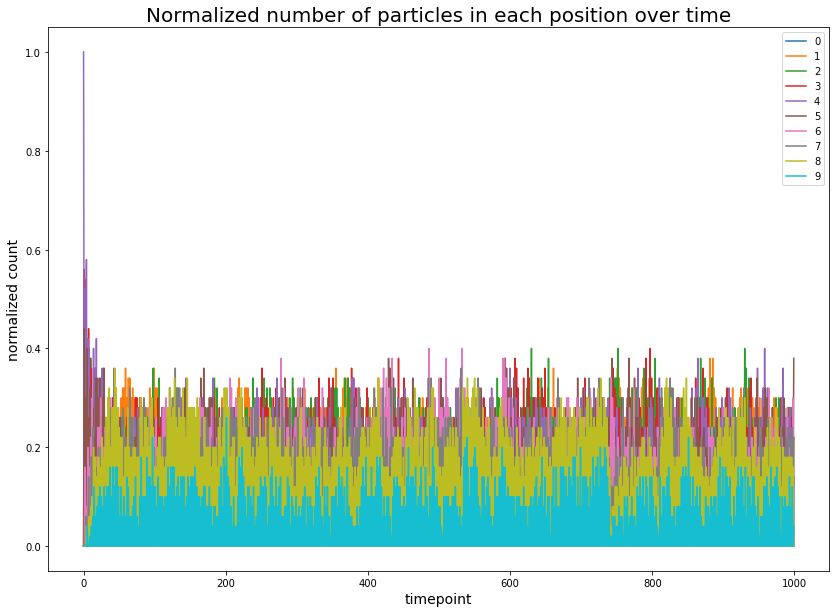

In [103]:
# plot particle counts for each position
plt.figure(figsize=(14,10))

for i in range(n_locs):
    plt.plot(list(range(n_t_pts)), p_per_loc[i, :])

plt.title("Normalized number of particles in each position over time", fontsize=20)
plt.xlabel("timepoint", fontsize=14)
plt.ylabel("normalized count", fontsize=14)
plt.legend(list(range(n_locs)))
plt.show()

### Define A (transition) matrix

In [104]:
# Define A (transition) matrix 
A = np.zeros((n_locs, n_locs))             # transition probability between grid points
vec_diag = np.full(n_locs, (-2*p))         # diagonal values
vec_off_diag = np.full((n_locs - 1), (p))  # off-diagonal values

# create transition matrix
A = np.diag(vec_diag, k=0) + np.diag(vec_off_diag, k=1) + np.diag(vec_off_diag, k=-1)


print("A = \n", A)

A = 
 [[-1.   0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5 -1.   0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5 -1.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5 -1.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5 -1.   0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.5 -1.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.5 -1.   0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5 -1.   0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.5 -1. ]]


### Find eigenvalues and vectors

In [105]:
e_val, e_vec = eig(A)
print('Eigenvalues: \n', e_val)
print('\nEigenvectors: \n', e_vec)

Eigenvalues: 
 [-1.95949297 -1.84125353 -1.65486073 -1.41541501 -1.14231484 -0.85768516
 -0.04050703 -0.15874647 -0.34513927 -0.58458499]

Eigenvectors: 
 [[-0.12013117 -0.23053002  0.3222527   0.38786839 -0.42206128  0.42206128
  -0.12013117  0.23053002 -0.3222527  -0.38786839]
 [ 0.23053002  0.38786839 -0.42206128 -0.3222527   0.12013117  0.12013117
  -0.23053002  0.38786839 -0.42206128 -0.3222527 ]
 [-0.3222527  -0.42206128  0.23053002 -0.12013117  0.38786839 -0.38786839
  -0.3222527   0.42206128 -0.23053002  0.12013117]
 [ 0.38786839  0.3222527   0.12013117  0.42206128 -0.23053002 -0.23053002
  -0.38786839  0.3222527   0.12013117  0.42206128]
 [-0.42206128 -0.12013117 -0.38786839 -0.23053002 -0.3222527   0.3222527
  -0.42206128  0.12013117  0.38786839  0.23053002]
 [ 0.42206128 -0.12013117  0.38786839 -0.23053002  0.3222527   0.3222527
  -0.42206128 -0.12013117  0.38786839 -0.23053002]
 [-0.38786839  0.3222527  -0.12013117  0.42206128  0.23053002 -0.23053002
  -0.38786839 -0.322252

## B. Edge case can stay in current position

If a particle is in the min/max position, it will (with equal probability) either stay where it is or move to the position next to it at the next time point.

### 1D Random Walk Diffusion Simulation

(implementation similar to GeeksforGeeks' ["Random Walk (Implementation in Python)"](https://www.geeksforgeeks.org/random-walk-implementation-python/))

In [106]:
def random_walk(N, n_t_pts, p):
    """1-D random walk for N molecules from a range of positions = [0, (n_locs - 1)]
    
    Args:
      N: 
        total number of molecules
      n_t_pts:
        number of time points
      p:
        probability of particle diffusing to neighboring grid point

    Returns:
      positions of all particles over time - matrix shaped (N, n_t_pts)
    """

    # initialize array for all particle positions
    all_N_positions = np.empty((N, n_t_pts), dtype='int64')

    for n in range(N):

        # Initialize starting position (0 to (n_locs - 1) range)
        positions = [start_loc]

        # sampling probability all at once (1000 timepoints) 
        r = np.random.random(n_t_pts - 1)

        # create movement decision conditions
        move_l_cond = r < p
        move_r_cond = r >= p

        # run simulation for particle n
        # check probability rolls 
        for move_left, move_right in zip(move_l_cond, move_r_cond):
        
            # if move_left is True and last position isn't the minimum position, move left
            left = move_left and positions[last_elem_i] > min_loc 

            # if move_right is True and last position isn't the maximum position, move right  
            right = move_right and positions[last_elem_i] < max_loc

            # adjust position accordingly 
            positions.append(positions[last_elem_i] - left + right)

        # add results to cumulative array
        all_N_positions[n] = positions
    
    return all_N_positions

### Post-processing

* Find the number of particles at each node at each time point

In [107]:
def postprocess_rw(all_N_positions):
    """Post-process 1D random-walk diffusion (counts, normalized counts, means)
    
    Args:
      all_N_positions: 
        positions of all particles over time - matrix shaped (N, n_t_pts)

    Returns:
      n_per_loc:
        number of particles in each position over time
      p_per_loc:
        number of particles normalized by N in each position over time
      means:
        mean value of particle number at each location over the whole simulation
    """

    # distribution of particles across positions over time
    n_per_loc = np.zeros((n_locs, n_t_pts), dtype='int64')      # number of particles over time
    p_per_loc = np.zeros((n_locs, n_t_pts))                     # normalized count over time

    for i in range(n_t_pts):
        # count number of particles in each position
        counts = np.bincount(all_N_positions[:,i])

        # resize to include all positions if it doesn't already
        counts.resize(n_locs)

        # assign number of particles
        n_per_loc[:, i] = counts

        # normalize counts and assign
        counts = counts / all_N_positions.shape[0]
        p_per_loc[:, i] = counts

    means = np.mean(n_per_loc, axis=1)

    return n_per_loc, p_per_loc, means

In [108]:
all_N_positions = random_walk(N, n_t_pts, p)
n_per_loc, p_per_loc, means = postprocess_rw(all_N_positions)

In [109]:
print(means)

[4.918 4.938 4.914 4.826 4.787 4.84  5.082 5.299 5.274 5.122]


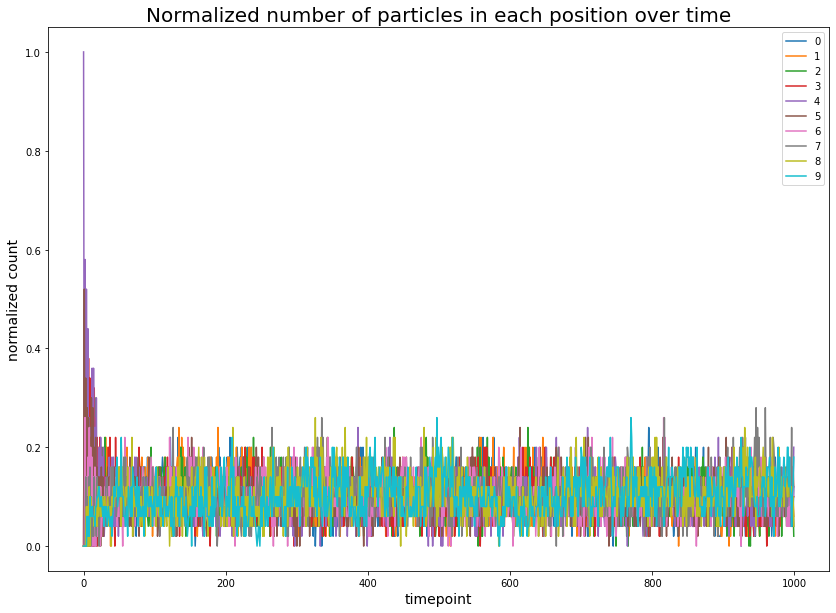

In [110]:
# plot particle counts for each position
plt.figure(figsize=(14,10))

for i in range(n_locs):
    plt.plot(list(range(n_t_pts)), p_per_loc[i, :])

plt.title("Normalized number of particles in each position over time", fontsize=20)
plt.xlabel("timepoint", fontsize=14)
plt.ylabel("normalized count", fontsize=14)
plt.legend(list(range(n_locs)))
plt.show()

### Solve for unknowns ($q_{+k}$ and $q_{-k}$)

#### Find $\mu_k$ and $q_k$

$q_k = \sum_i \mu_{ik} p_i$

In [94]:
# q based on equation above
q_per_loc = np.sum((p_per_loc.T*means), axis=1)

# print output
print("q shape:", q_per_loc.shape)
print("\n")
print("First 10 q-values: \n", q_per_loc[:10])

q shape: (1000,)


First 10 q-values: 
 [5.193   5.19634 5.1612  5.1217  5.13108 5.11754 5.1041  5.10422 5.07902
 5.05852]


$q_k = \frac{1}{N} \sum_i \mu_{ik} p_i$

In [95]:
# q (normalized) based on equation above
print("First 10 q-values normalized by number of particles:\n", 
        (q_per_loc/N)[:10])

First 10 q-values normalized by number of particles:
 [0.10386   0.1039268 0.103224  0.102434  0.1026216 0.1023508 0.102082
 0.1020844 0.1015804 0.1011704]


$\mu^2_k = \sum_i p_i (\mu_{i k})^2$

In [96]:
# mu_k based on equation above
means_k = np.sqrt(np.sum(p_per_loc.T*np.square(means), axis=1))

# print output
print("mu shape:", means_k.shape)
print("\n")
print("First 10 mu_k-values: \n", means_k[:10])

mu shape: (1000,)


First 10 mu_k-values: 
 [5.193      5.1963524  5.1614119  5.12291248 5.13186356 5.11930644
 5.10569301 5.10625164 5.08123597 5.06088111]


#### Solve system of equations
$q_{+k} + q_{-k} = N$   
$N \mu_k (q_{+k} - q_{-k}) = q_k$

### Define A (transition) matrix

In [ ]:
# Define A (transition) matrix 
A = np.zeros((n_locs, n_locs))             # transition probability between grid points
vec_diag = np.full(n_locs, (-2*p))         # diagonal values
vec_off_diag = np.full((n_locs - 1), (p))  # off-diagonal values

# create transition matrix
A = np.diag(vec_diag, k=0) + np.diag(vec_off_diag, k=1) + np.diag(vec_off_diag, k=-1)
A[0,0] = p
A[n_locs - 1, n_locs - 1] = p


print("A = \n", A)

A = 
 [[ 0.5  0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5 -1.   0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5 -1.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5 -1.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5 -1.   0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.5 -1.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.5 -1.   0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5 -1.   0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.5]]


### Find eigenvalues and vectors

In [ ]:
e_val, e_vec = eig(A)
print('Eigenvalues: \n', e_val)
print('\nEigenvectors: \n', e_vec)

Eigenvalues: 
 [-1.9457783  -1.78853655 -1.54405175 -1.2370472  -0.89910151 -0.56632986
 -0.27767487 -0.07481325  0.66672686  0.66660643]

Eigenvectors: 
 [[ 0.03766384 -0.07368634 -0.10628441 -0.13330549  0.1517679   0.15688047
  -0.14020148 -0.08885072 -0.66655385 -0.66677965]
 [-0.18423479  0.33726777  0.43450167  0.46311585 -0.42467741 -0.33457266
   0.21806234  0.10214514 -0.22226486 -0.22217955]
 [ 0.3108267  -0.45820959 -0.36649838 -0.08625514 -0.23746652 -0.44706881
   0.4552253   0.27785737 -0.07435576 -0.07379209]
 [-0.40371151  0.38536225 -0.03571349 -0.42222277  0.37675738 -0.05318813
   0.43957901  0.41199478 -0.02559663 -0.0237852 ]
 [ 0.45281647 -0.14953486  0.40535836  0.28642859  0.31349503  0.4009366
   0.17981264  0.48448685 -0.01096942 -0.00548905]
 [-0.45281647 -0.14953486 -0.40535836  0.28642859 -0.31349503  0.4009366
  -0.17981264  0.48448685 -0.01096942  0.00548905]
 [ 0.40371151  0.38536225  0.03571349 -0.42222277 -0.37675738 -0.05318813
  -0.43957901  0.411994